### questo file è ancora tutta una bozza; in ogni caso questa era l'indicazione che ci hanno dato in classe: 
##### "not first pca (not required) and then clustering → in this way we are changing the domain"
### quindi prima importante concentrarsi sul far funzionare clustering sul dataset in generale, e poi usare pca (anche se cmq non richiesto) per visualizzare risultati del clustering; sostanzialmente seguire schema sotto:


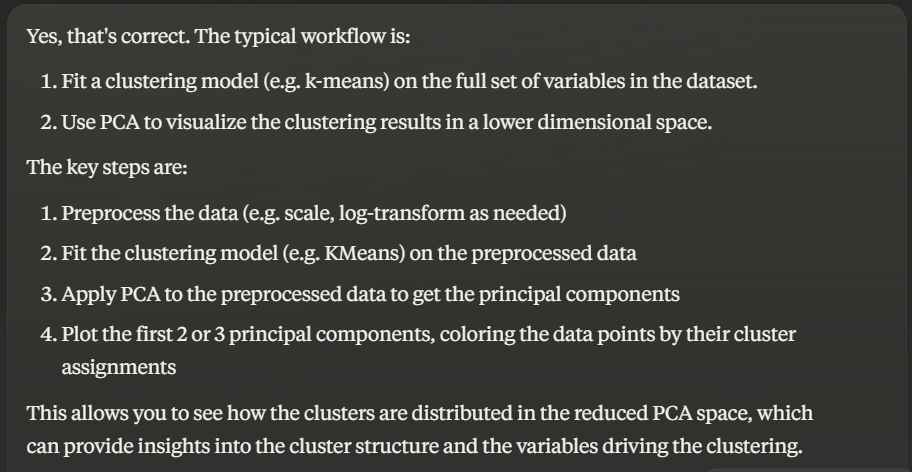

# PCA - kmeans

#### lo facciamo fare su pp_train --> a cui applichiamo, direttamente nella funzione, log transformation e standardscaler

C:\Users\Gagia\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([1, 1, 1, ..., 2, 2, 1]),                                   PC1       PC2       PC3       PC4       PC5
startYear                    0.028570  0.531683 -0.580234  0.278512  0.167027
fill_runtimeMinutes          0.162418 -0.121934 -0.432423 -0.775690  0.266314
awardWins                    0.235500  0.533082  0.330049 -0.270743 -0.194159
numVotes                     0.388905 -0.180475 -0.023785  0.178379 -0.197174
totalImages                  0.335814 -0.115497 -0.049059  0.156635 -0.266492
totalVideos                  0.293746  0.134383 -0.012811  0.324724  0.660288
totalCredits                 0.266350  0.016364 -0.518073  0.037523 -0.500531
criticReviewsTotal           0.383532 -0.119944  0.060074  0.034972  0.155042
awardNominationsExcludeWins  0.280176  0.504804  0.261490 -0.177311 -0.089049
numRegions                   0.345603 -0.180663  0.108864 -0.181049  0.187073
userReviewsTotal             0.388663 -0.228427  0.109693  0.137063  0.010457, array([0.42978998, 0.12257045,

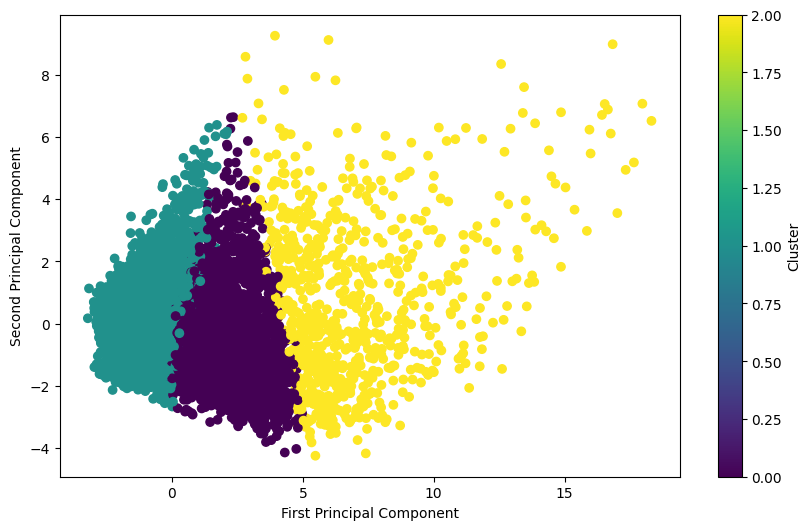

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def pca_clustering(df, n_clusters=3):
    # Select features
    features = ['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
                'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal',
                'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal'] 

# Prepare data
    X = df[features].copy()
    X = np.log1p(X)  # Log transform to handle skewed distributions
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Determine components explaining 80% variance
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cum_var_ratio >= 0.8) + 1
    
    # Perform clustering on reduced dimensions
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_pca[:, :n_components])
    
    # Plot results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster')
    
    # Return results
    explained_var = pd.DataFrame(
        pca.components_[:n_components].T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=features
    )
    
    return clusters, explained_var, pca.explained_variance_ratio_

pp_train = pd.read_csv("pp_train.csv")

print(pca_clustering(pp_train, n_clusters=3))

## CURVA PCA PLOT - k-means


#### con df log-transformed

In [10]:
pp_train = pd.read_csv('pp_train.csv')

In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def determine_pca_components(df):
    # Select clustering variables
    X = df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
            'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
            'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal','is_Documentary', 'is_History',
            'is_Adventure', 'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi',
            'is_Romance', 'is_Biography', 'is_Musical', 'is_Western', 'is_Music',
            'is_Film-Noir', 'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action',
            'is_Crime', 'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery',
            'is_Talk-Show', 'is_Drama', 'is_Sport', 'is_War', 'is_Horror',
            'is_Animation']]
    


    # Perform PCA
    pca = PCA()
    pca.fit(X)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Determine optimal number of components
    for i, ratio in enumerate(cum_var_ratio):
        if ratio >= 0.8:
            return i + 1
    
    return len(cum_var_ratio)

# Example usage
pp_train = pd.read_csv('pp_train.csv')
optimal_components = determine_pca_components(pp_train)
print(f"Optimal number of principal components: {optimal_components}")

Optimal number of principal components: 1


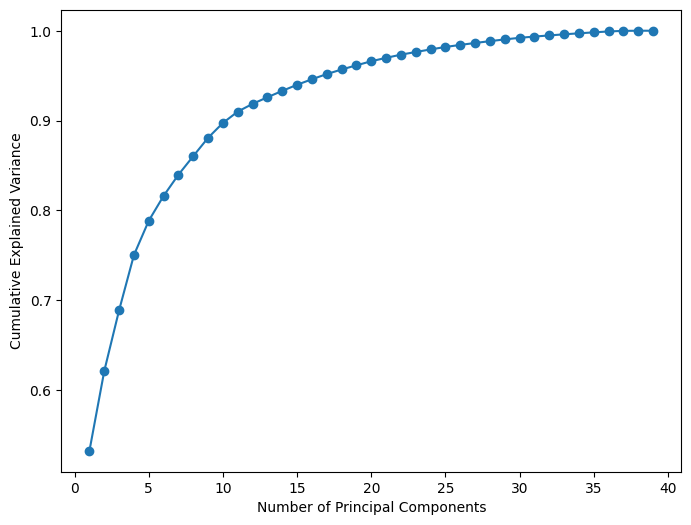

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_pca_components(df):
    # Select clustering variables

    #X = df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
          #  'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
          # 'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal']]

    X = df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
            'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
            'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal','is_Documentary', 'is_History',
            'is_Adventure', 'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi',
            'is_Romance', 'is_Biography', 'is_Musical', 'is_Western', 'is_Music',
            'is_Film-Noir', 'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action',
            'is_Crime', 'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery',
            'is_Talk-Show', 'is_Drama', 'is_Sport', 'is_War', 'is_Horror',
            'is_Animation']]
    
    # Perform PCA
    pca = PCA()
    pca.fit(X)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio, marker='o')
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Cumulative Explained Variance')
    #ax.set_title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
    
    plt.show()

# Example usage
df_pp_log = pd.read_csv('df_pp_log.csv')
visualize_pca_components(df_pp_log)

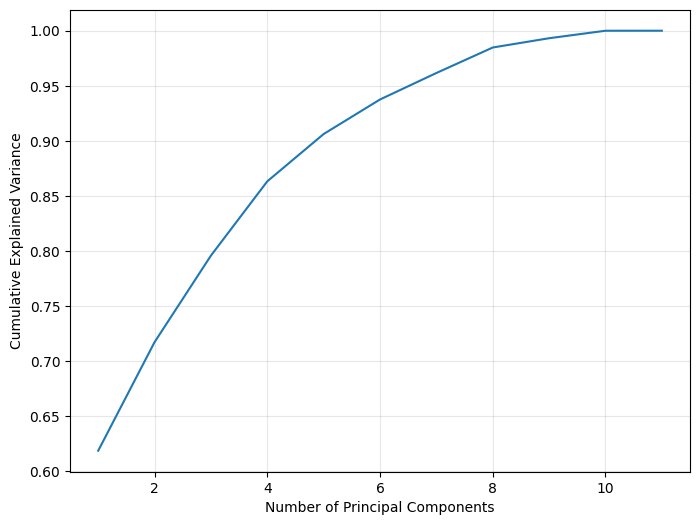

In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_pca_components(df):
    # Select clustering variables
    X = df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
            'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
            'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal']]

    #X = df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
               # 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
               # 'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal','is_Documentary', 'is_History',
               # 'is_Adventure', 'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi',
               # 'is_Romance', 'is_Biography', 'is_Musical', 'is_Western', 'is_Music',
               # 'is_Film-Noir', 'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action',
               # 'is_Crime', 'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery',
               # 'is_Talk-Show', 'is_Drama', 'is_Sport', 'is_War', 'is_Horror',
               # 'is_Animation']]
    
    # Perform PCA
    pca = PCA()
    pca.fit(X)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio)
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Cumulative Explained Variance')
    #ax.set_title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
    
    # Add background grid
    ax.grid(True, alpha=0.3)
    plt.show()

# Example usage
df_pp_log = pd.read_csv('df_pp_log.csv')
visualize_pca_components(df_pp_log)

## DBSCAN

#### PCA e dbscan - senza ricerca parametri

In [14]:

'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def pca_dbscan_clustering(df, eps=0.3, min_samples=20):
    features = ['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
                'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal',
                'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal']
    
    X = df[features].copy()
    X = np.log1p(X)  # Log transform
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=0.8)  # Keep components explaining 80% variance
    X_pca = pca.fit_transform(X_scaled)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_pca)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster')
    
    explained_var = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=features
    )
    
    return clusters, explained_var, pca.explained_variance_ratio_


pp_train = pd.read_csv("pp_train.csv")

print(pca_dbscan_clustering(pp_train))

'''

'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nfrom sklearn.cluster import DBSCAN\nimport matplotlib.pyplot as plt\n\ndef pca_dbscan_clustering(df, eps=0.3, min_samples=20):\n    features = [\'startYear\', \'fill_runtimeMinutes\', \'awardWins\', \'numVotes\', \n                \'totalImages\', \'totalVideos\', \'totalCredits\', \'criticReviewsTotal\',\n                \'awardNominationsExcludeWins\', \'numRegions\', \'userReviewsTotal\']\n    \n    X = df[features].copy()\n    X = np.log1p(X)  # Log transform\n    \n    scaler = StandardScaler()\n    X_scaled = scaler.fit_transform(X)\n    \n    pca = PCA(n_components=0.8)  # Keep components explaining 80% variance\n    X_pca = pca.fit_transform(X_scaled)\n    \n    dbscan = DBSCAN(eps=eps, min_samples=min_samples)\n    clusters = dbscan.fit_predict(X_pca)\n    \n    plt.figure(figsize=(10, 6))\n    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cl

## PCA E DBSCAN
#### lo facciamo fare su pp_train perchè in questa versione c'è già linea di codice per trasf logaritmica

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([[-0.33761558, -0.25335925, -0.14472985,  0.38973666, -0.16688676],
       [-2.21677022,  0.02153844,  1.45152253,  0.0480375 ,  1.06392872],
       [-0.86839459, -0.17400148, -0.49556082, -0.63575224,  0.23636668],
       ...,
       [ 5.30949449,  1.07743725, -0.92238906,  0.93758117,  1.38786127],
       [ 6.00187552, -2.76662803,  0.15881855,  0.73584898,  1.38600939],
       [-1.43122851,  0.86317412, -0.13023561,  1.4688193 , -0.2694551 ]]), array([0.42978998, 0.12257045, 0.10541694, 0.08313681, 0.06169792]))


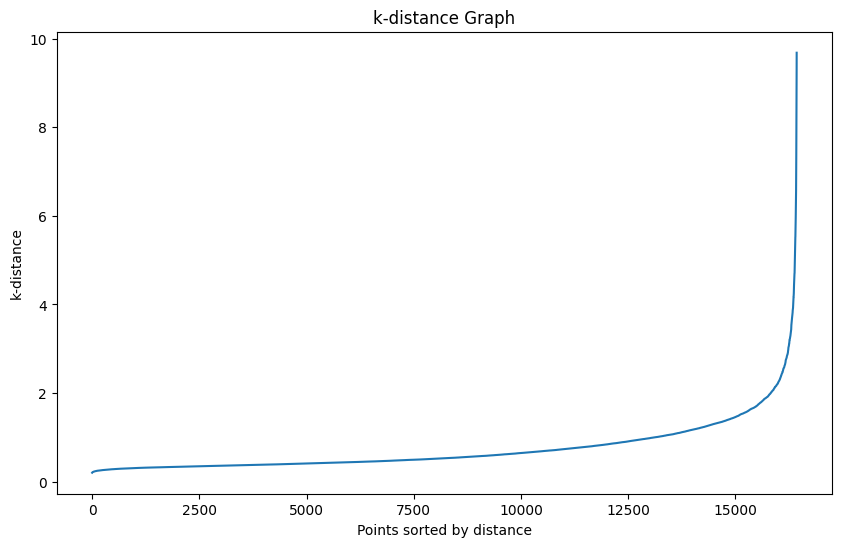

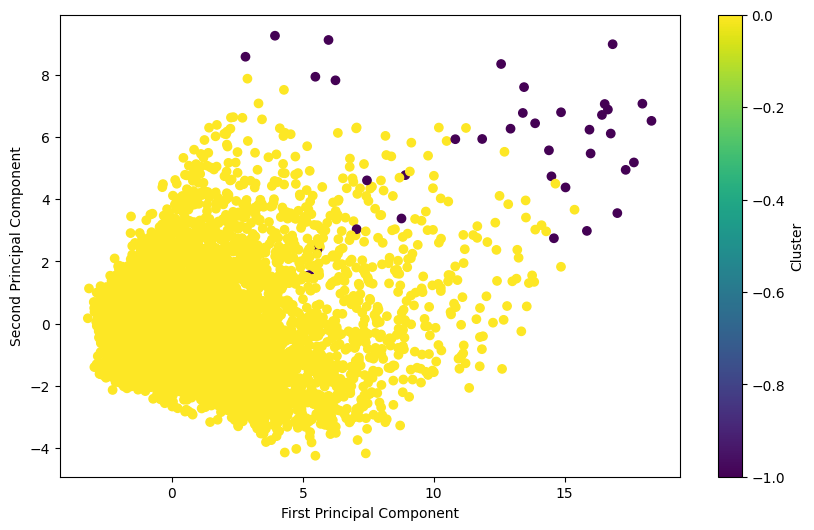

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import matplotlib.pyplot as plt

def analyze_and_cluster(df):
    # Prepare data
    features = ['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
                'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal',
                'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal']
    
    X = df[features].copy()
    X = np.log1p(X)
    
    # Scale and PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=0.8)
    X_pca = pca.fit_transform(X_scaled)
    
    # Find optimal eps
    suggested_eps, _ = find_dbscan_params(X_pca)
    
    # Perform clustering
    min_samples = 2 * X_pca.shape[1]  # 2 * number of dimensions
    dbscan = DBSCAN(eps=suggested_eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_pca)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster')
    
    return clusters, X_pca, pca.explained_variance_ratio_

def find_dbscan_params(X, k_range=(2, 50)):
    k = k_range[1]
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    
    k_dist = np.sort(distances[:, -1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(k_dist)), k_dist)
    plt.xlabel('Points sorted by distance')
    plt.ylabel('k-distance')
    plt.title('k-distance Graph')
    
    knee_locator = KneeLocator(
        range(len(k_dist)), 
        k_dist,
        curve='convex',
        direction='increasing'
    )
    
    suggested_eps = k_dist[knee_locator.knee]
    
    return suggested_eps, k_dist


pp_train = pd.read_csv("pp_train.csv")


print(analyze_and_cluster(pp_train))